In [92]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 
from typing import Any, Optional, List

import qubx
%qubxd dev 

%load_ext autoreload
%autoreload 2

from qubx import lookup, logger
from qubx.data.readers import CsvStorageDataReader, MultiQdbConnector, QuestDBConnector, DataReader, AsTimestampedRecords, AsQuotes, RestoreTicksFromOHLC, AsPandasFrame, RestoreTicksFromOHLC, AsOhlcvSeries
from qubx.pandaz.utils import *
from qubx.data.helpers import  InMemoryCachedReader, loader

 >  [dev] installing cython rebuilding hook
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Aux Data interface

In [20]:
r_csv = CsvStorageDataReader("../tests/data/csv")
r_mqc = MultiQdbConnector("xlydian-data")
r_qdb = QuestDBConnector(host="xlydian-data")

In [10]:
r_csv.get_aux_data_ids(), r_qdb.get_aux_data_ids(), r_mqc.get_aux_data_ids()

(set(),
 {'average_quote_volume', 'candles', 'fundamental_data', 'symbols'},
 {'average_quote_volume', 'candles', 'fundamental_data', 'symbols'})

In [ ]:
r_mqc.get_aux_data('candles', exchange='BINANCE.UM', 
                   symbols=['BTCUSDT', 'ETHUSDT'], 
                   start='2024-01-01', stop='2024-01-31')

In [26]:
r_qdb.get_aux_data('fundamental_data', exchange='BINANCE.UM', 
                #    symbols=['BTCUSDT', 'ETHUSDT'], 
                   start='2024-01-01', stop='2024-02-01')

metric                  market_cap       price        volume    volume_usd
timestamp  symbol                                                         
2024-01-01 1INCHUSDT  4.810212e+08     0.42810  2.528007e+07  1.082240e+07
           AAVEUSDT   1.604350e+09   108.78000  1.155772e+06  1.257249e+08
           ACHUSDT    1.051147e+08     0.02136  4.327358e+08  9.243236e+06
           ADAUSDT    2.076801e+10     0.59410  3.323489e+08  1.974485e+08
           AGIXUSDT   3.989788e+08     0.31970  4.189333e+07  1.339330e+07
...                            ...         ...           ...           ...
2024-01-31 YFIUSDT    2.435439e+08  7309.00000  1.259769e+03  9.207652e+06
           ZECUSDT    3.307871e+08    22.59000  5.673166e+05  1.281568e+07
           ZENUSDT    1.160340e+08     7.94800  5.515012e+05  4.383332e+06
           ZILUSDT    3.599965e+08     0.02046  3.587373e+08  7.339764e+06
           ZRXUSDT    2.798377e+08     0.33150  1.322362e+08  4.383631e+07

[5456 rows x 4 columns]

# Handy reader

In [27]:
r_mqc = MultiQdbConnector("xlydian-data")

In [28]:
F = '4h'
_P = lambda ds: [print(f"{s} : {len(v)} | {v.index[0]} : {v.index[-1]}") for s, v in ds.items()]
mcr = InMemoryCachedReader('BINANCE.UM', r_mqc, F)

In [29]:
mcr.read("BTCUSDT", "2020-01-01", "2024-08-10", transform=AsPandasFrame());

In [ ]:
mcr["ASTRUSDT", '2020-01-01':'2024-01-01'].close.plot()

In [ ]:
mcr["ASTRUSDT", '2020-01-01':'2025-01-01'].close.plot()

<Axes: xlabel='timestamp'>

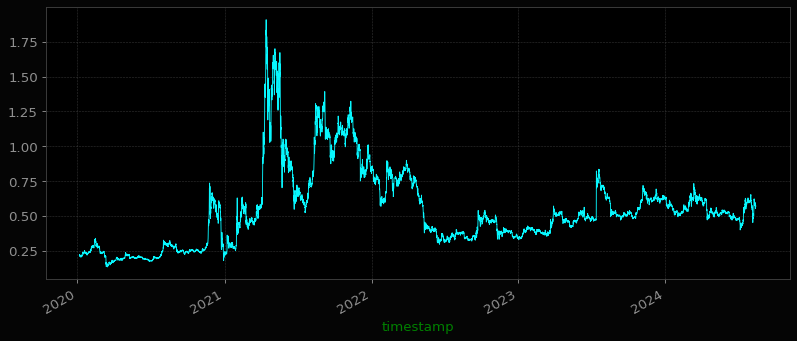

In [15]:
mcr["XRPUSDT", '2020-01-01':'2025-01-01'].close.plot()

In [ ]:
mcr.read("BTCUSDT", "2020-01-01", "2024-08-10", transform=AsPandasFrame())

In [ ]:
mcr["ATAUSDT"]

In [32]:
_P(mcr._get_smbs_at(['LTCUSDT', 'BTCUSDT'], "2023-01-01", "2024-01-01" ));

LTCUSDT : 2191 | 2023-01-01 00:00:00 : 2024-01-01 00:00:00
BTCUSDT : 2191 | 2023-01-01 00:00:00 : 2024-01-01 00:00:00


In [33]:
_P(mcr._get_smbs_at(['LTCUSDT', 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'XRPUSDT'], "2021-01-01", "2024-06-01" ));

LTCUSDT : 7453 | 2021-01-01 00:00:00 : 2024-06-01 00:00:00
BTCUSDT : 7459 | 2021-01-01 00:00:00 : 2024-06-01 00:00:00
ETHUSDT : 7483 | 2021-01-01 00:00:00 : 2024-06-01 00:00:00
SOLUSDT : 7453 | 2021-01-01 00:00:00 : 2024-06-01 00:00:00
XRPUSDT : 7453 | 2021-01-01 00:00:00 : 2024-06-01 00:00:00


In [ ]:
mcr1 = InMemoryCachedReader('BINANCE.UM', r_mqc, F)
_P(x1:=mcr1['LTCUSDT', "2021-01-01" : "2024-06-01"])
_P(x2:=mcr['LTCUSDT',  "2021-01-01" : "2024-06-01"])
all(x1==x2)

In [70]:
mcr["GALAUSDT", :'2023-01-01']

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
timestamp,,,,,,,,,
2021-09-18 00:00:00,0.11358,0.12022,0.11148,0.11445,6.305044e+07,7351074.5,22840,26654140.0,3109883.2
2021-09-18 04:00:00,0.11442,0.11887,0.10412,0.10837,2.382351e+08,26215362.0,80628,109107784.0,12020291.0
2021-09-18 08:00:00,0.10837,0.11798,0.10440,0.11310,2.995232e+08,33087352.0,95557,140715968.0,15578291.0
2021-09-18 12:00:00,0.11319,0.13840,0.11272,0.13000,1.920679e+09,250446624.0,507988,974595710.0,127152928.0
2021-09-18 16:00:00,0.13000,0.13190,0.11319,0.11586,1.028713e+09,124677496.0,271595,498680224.0,60459776.0
...,...,...,...,...,...,...,...,...,...
2022-12-31 08:00:00,0.01640,0.01655,0.01632,0.01641,2.386384e+08,3919607.0,14892,118997912.0,1955452.8
2022-12-31 12:00:00,0.01640,0.01692,0.01633,0.01661,6.860614e+08,11443808.0,35514,356820256.0,5953916.0
2022-12-31 16:00:00,0.01661,0.01678,0.01649,0.01652,3.119849e+08,5189706.0,17815,146555328.0,2438995.5


In [94]:
ldr = loader("BINANCE.UM", '1h')

In [98]:
ldr['SOLUSDT', '2020-01-01':'2024-01-01']

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
timestamp,,,,,,,,,
2020-09-14 07:00:00,3.2002,4.9100,3.2002,3.3666,426044.000,1.430646e+06,7061,155718.000,5.242598e+05
2020-09-14 08:00:00,3.3663,3.5650,3.3000,3.3298,754888.000,2.575190e+06,10434,326017.984,1.116673e+06
2020-09-14 09:00:00,3.3298,3.3567,3.2161,3.2755,361947.008,1.185071e+06,4489,147080.000,4.823903e+05
2020-09-14 10:00:00,3.2753,3.3873,3.2500,3.3673,317776.992,1.051486e+06,3890,132282.000,4.383941e+05
2020-09-14 11:00:00,3.3686,3.4600,3.3200,3.3799,301401.984,1.022089e+06,4365,148440.992,5.033700e+05
...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,103.8920,105.0000,103.5790,104.9140,664518.976,6.943846e+07,77581,343751.008,3.592391e+07
2023-12-31 21:00:00,104.9090,105.2000,103.1980,103.9270,595192.000,6.219012e+07,66415,276161.984,2.888626e+07
2023-12-31 22:00:00,103.9280,104.0380,100.0000,100.5730,1402956.032,1.427677e+08,138671,606640.000,6.172560e+07


In [100]:
ldr.get_symbols()

['BINANCE.UM:SOLUSDT']